         Date  MMWR_week Location  Distributed  Distributed_Janssen  \
0  04/12/2023         15       GA     28537115               869100   
1  04/12/2023         15       MD     22187480               616500   
2  04/12/2023         15       NH      5094490               189000   
3  04/12/2023         15       DE      3318735               102600   
4  04/12/2023         15      VA2      9838120               626900   

   Distributed_Moderna  Distributed_Pfizer  Distributed_Novavax  \
0              9773940            14756995              39900.0   
1              6431280            11823770              36200.0   
2              1454740             2635340               4700.0   
3              1071000             1649955               5000.0   
4              4250780             3780600              11800.0   

   Distributed_Unk_Manuf  Dist_Per_100K  ...  Dist_Bivalent_PFR  \
0                      0         268776  ...          2129520.0   
1                      0         366

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Novavax,Distributed_Unk_Manuf,Dist_Per_100K,...,Dist_Bivalent_PFR,Dist_Bivalent_MOD,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
0,04/12/2023,15,GA,28537115,869100,9773940,14756995,39900.0,0,268776,...,2129520.0,967660.0,1103844.0,11.1,1081566.0,12.0,1045881.0,12.9,465410.0,30.7
1,04/12/2023,15,MD,22187480,616500,6431280,11823770,36200.0,0,366997,...,2317390.0,962340.0,1446046.0,25.4,1402545.0,27.2,1340236.0,28.4,529222.0,55.2
2,04/12/2023,15,NH,5094490,189000,1454740,2635340,4700.0,0,374674,...,651790.0,158920.0,318165.0,24.5,312071.0,26.0,301807.0,27.3,145159.0,57.2
3,04/12/2023,15,DE,3318735,102600,1071000,1649955,5000.0,0,340815,...,336740.0,153440.0,204016.0,22.2,200501.0,23.9,194289.0,25.2,100782.0,53.4
4,04/12/2023,15,VA2,9838120,626900,4250780,3780600,11800.0,0,0,...,560640.0,607400.0,866731.0,0.0,866731.0,0.0,866701.0,0.0,562196.0,0.0


,Administered,Distributed
Location,,
AK,459808945,624721275
AL,2451644246,3751160010
AR,1661495971,2363182385
AS,37453485,42552940
AZ,4693529795,5826807575
...,...,...
VT,547641822,674293915
WA,5629164042,6884435885
WI,4021833993,4555584210


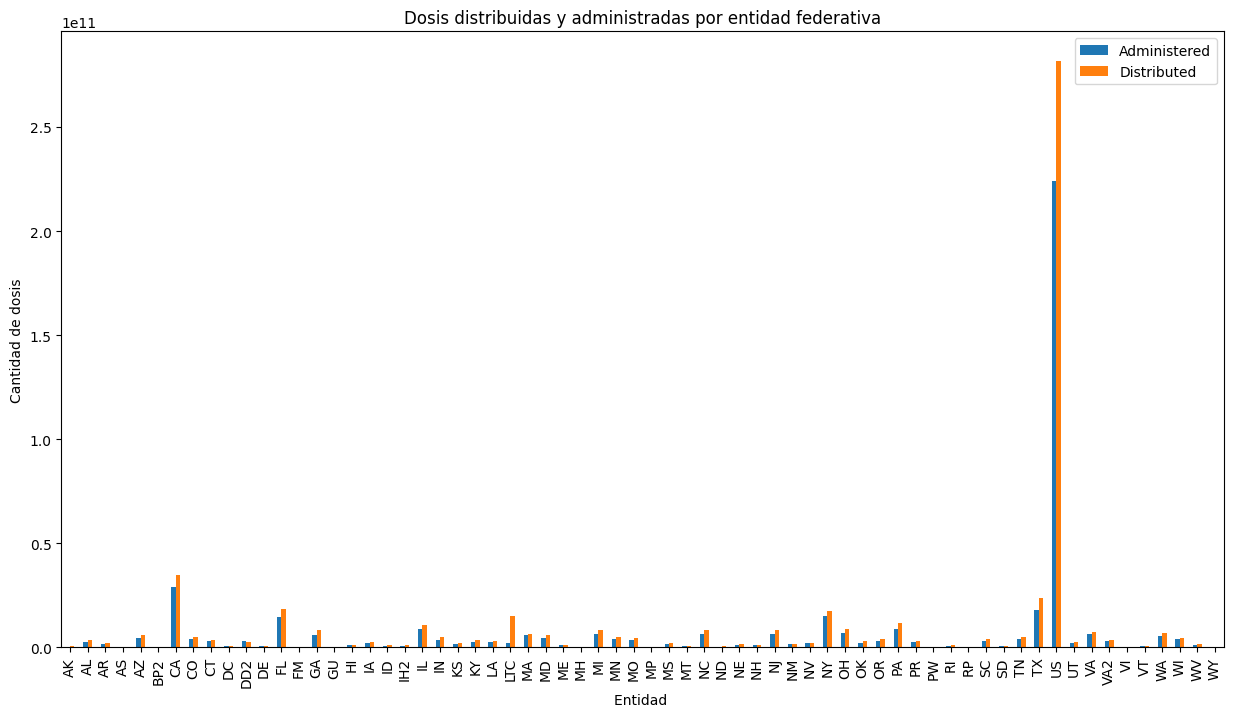

ERROR:fiona._env:`/vsizip/cb_2019_us_state_500k.zip' does not exist in the file system, and is not recognized as a supported dataset name.


Location
AK      767302
AL     3787974
AR     2653662
AS       87817
AZ     8512197
        ...   
VT     1038049
WA    10628602
WI     7376907
WV     1686707
WY      449132
Name: Administered_Pfizer, Length: 66, dtype: int64
Location
AK     0
AL     0
AR     0
AS     0
AZ     0
      ..
VT     0
WA     0
WI     0
WV    29
WY     0
Name: Administered_Pfizer, Length: 66, dtype: int64


DriverError: ignored

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
%matplotlib inline
import descartes
import fiona
import shapely
df=pd.read_csv("https://raw.githubusercontent.com/memocantu01/Project1/main/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv")



print(df.head())

display(df.head())
# Crear la tabla dinámica con la ubicación, la cantidad de dosis distribuidas y la cantidad de dosis administradas
tabla = df.pivot_table(index='Location', values=['Distributed', 'Administered'], aggfunc='sum')

# Mostrar la tabla
display(tabla)


# Crear la gráfica de barras

ax = tabla.plot(kind='bar', figsize=(15,8))


#Agregar títulos y etiquetas de los ejes"
ax.set_title('Dosis distribuidas y administradas por entidad federativa')
ax.set_xlabel('Entidad ')
ax.set_ylabel('Cantidad de dosis')

# Mostrar la gráfica
plt.show()

# Encontrar el valor máximo de Administered Pfizer por estado
max_administered_pfizer_por_estado = df.groupby('Location')['Administered_Pfizer'].max()

# Mostrar los resultados
print(max_administered_pfizer_por_estado)

# Encontrar el valor mínimo de Administered Pfizer por estado
min_administered_pfizer_por_estado = df.groupby('Location')['Administered_Pfizer'].min()

# Mostrar los resultados
print(min_administered_pfizer_por_estado)

# Cargar el shapefile de los estados de EE.UU. en un objeto GeoDataFrame
#estados = gpd.read_file("https://github.com/memocantu01/Project1/blob/main/cb_2019_us_state_500k.shp")
#estados = gpd.read_file('cb_2019_us_state_500k.shp')
#estados = gpd.read_file('zip://cb_2019_us_state_500k.zip')
#estados.head()
#estados=gpd.read_file("cb_2019_us_state_500k.zip")
# Fusionar los datos de la vacunación con los datos del GeoDataFrame de los estados
estados = estados.merge(df, left_on='NAME', right_on='Location')

# Calcular la media de dosis administradas por estado
media_administradas = estados['Administered'].mean()

estados = estados.set_index('Location')

#Crear una columna para identificar los estados por encima o por debajo de la media
estados['colores'] = 'gray'
estados.loc[estados['Administered'] > media_administradas, 'colores'] = 'green'
estados.loc[estados['Administered'] <= media_administradas, 'colores'] = 'red'


# Crear el mapa y ajustar la escala para que se ajuste a los límites de los EE.UU.


ax = estados.plot(column='colores', legend=True, figsize=(10,5),aspect="equal")
ax.axis('off')
ax.set_xlim([-140,-50])
ax.set_ylim([15, 60])

plt.tight_layout()

# Añadir un título al mapa
ax.set_title('Estados de EE.UU. con la cantidad de dosis administradas de vacunas', fontdict={'fontsize': 20, 'fontweight' : 'bold'})

# Añadir una leyenda personalizada
legend_colors = {'green': 'Por encima de la media', 'red': 'Por debajo de la media'}
patches = [plt.plot([],[], marker='o', ms=10, ls="", mec=None, color=color, 
            label=label)[0]  for color, label in legend_colors.items()]
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()


El archivo anterior fue tomado de la organizacion Centers for Disease Control and Prevention.En este documento se puede observar las dosis distrubuidas y administradas en distintos estados de U.S.A.


Los datos presentes en dicho documento pueden tener muchas posibles aplicaciones ,se puede tratar de demostrar la hipotesis de que en aquellos estados con mayores dosis administradas,las muertes por COVID-19 son menores que en aquellos que no.El presente codigo mouestra un mapa con los estados por encima de la media en dosis distrubuidas y administradas en color verde mientras que aquellos por debajo de la media en rojo.


Los datos contenidos en este codigo podrian responder a las siguientes probelmaticas:

¿Que estado tuvo mayor cantidad de  dosis adminstradas entre la poblacion?

¿Que estado tuve la menor?

¿Habra una correlacion entre las dosis adminsitradas y la cantidad de defunciones en dichos estados?

¿Afecta la ideologia politica el porcentaje de vacunacion?

¿Que efectos tuvieron los refuerzos de vacunacion?

¿Que vacuna tuvo mayor efectivad (Pfizer,Moderna,Jonhson,etc)?

Porcentajes de la poblacion vacunados

Gastos en salud publica estatales y dosis distribuidas


Esta informacion seria relevante para el gobierno de U.S.A para ver la efectividad de sus esquemas de vacunacion y sus efectos en la poblacion .Ademas grupos de medicos y cientificos podrian usar la informacion para validar hipotesis sobre las vacunas de Covid-19.

Los probelmas que se presentaron al realizar el codigo fueron usar librerias nuevas como GeoPandas que se usan para visualizar mapas en Pyton ya que nunca antes habia trabajado con ellas.Otro problema que presente fue el de ajustar los mapas ,titulos y leyendas para que sean visualmente atractivos para el lector y pueda se pueda transmitir adecuadamente los datos.









In [ ]:
!pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_state_500k.zip


--2023-04-19 16:11:19--  https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_state_500k.zip
Resolving www2.census.gov (www2.census.gov)... 173.223.60.166, 2600:1408:7:1bd::208c, 2600:1408:7:191::208c
Connecting to www2.census.gov (www2.census.gov)|173.223.60.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘cb_2019_us_state_500k.zip’

cb_2019_us_state_50     [ <=>                ]   3.15M  --.-KB/s    in 0.1s    

2023-04-19 16:11:20 (23.7 MB/s) - ‘cb_2019_us_state_500k.zip’ saved [3301403]



In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 50.6 MB/s eta 0:00:00


In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install fiona

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_state_500k.zip

--2023-04-20 00:27:08--  https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_state_500k.zip
Resolving www2.census.gov (www2.census.gov)... 104.113.28.236, 2600:1407:2800:2a8::208c, 2600:1407:2800:2a3::208c
Connecting to www2.census.gov (www2.census.gov)|104.113.28.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘cb_2019_us_state_500k.zip’

cb_2019_us_state_50     [ <=>                ]   3.15M  --.-KB/s    in 0.1s    

2023-04-20 00:27:08 (21.3 MB/s) - ‘cb_2019_us_state_500k.zip’ saved [3301403]



In [ ]:
pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
